In [13]:
import mplfinance as mpf
import pandas as pd 
import numpy as np 
import pandas_datareader.data as web
from datetime import datetime

In [15]:
start = datetime(2018, 1, 1)
end = datetime(2020, 12, 31)

df = pd.DataFrame()
df = web.DataReader('AAPL', data_source='yahoo', start=start, end=end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.442081
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.434864
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.627323
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,42.101261
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.944889


In [18]:
from mpl_toolkits.mplot3d import Axes3D

strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)

strike, ttm = np.meshgrid(strike, ttm)

In [22]:
strike[:2]

array([[ 50.        ,  54.34782609,  58.69565217,  63.04347826,
         67.39130435,  71.73913043,  76.08695652,  80.43478261,
         84.7826087 ,  89.13043478,  93.47826087,  97.82608696,
        102.17391304, 106.52173913, 110.86956522, 115.2173913 ,
        119.56521739, 123.91304348, 128.26086957, 132.60869565,
        136.95652174, 141.30434783, 145.65217391, 150.        ],
       [ 50.        ,  54.34782609,  58.69565217,  63.04347826,
         67.39130435,  71.73913043,  76.08695652,  80.43478261,
         84.7826087 ,  89.13043478,  93.47826087,  97.82608696,
        102.17391304, 106.52173913, 110.86956522, 115.2173913 ,
        119.56521739, 123.91304348, 128.26086957, 132.60869565,
        136.95652174, 141.30434783, 145.65217391, 150.        ]])

In [24]:
# fake implied volatility
iv = (strike - 100) ** 2 / (100 * strike) / ttm
iv[:2]

array([[1.00000000e+00, 7.66956522e-01, 5.81320451e-01, 4.33283358e-01,
        3.15568022e-01, 2.22661397e-01, 1.50310559e-01, 9.51821387e-02,
        5.46265329e-02, 2.65111347e-02, 9.10010111e-03, 9.66183575e-04,
        9.25069380e-04, 7.98580302e-03, 2.13128730e-02, 4.01968827e-02,
        6.40316206e-02, 9.22959573e-02, 1.24539425e-01, 1.60370634e-01,
        1.99447895e-01, 2.41471572e-01, 2.86177807e-01, 3.33333333e-01],
       [8.51851852e-01, 6.53333333e-01, 4.95198903e-01, 3.69093231e-01,
        2.68817204e-01, 1.89674523e-01, 1.28042328e-01, 8.10810811e-02,
        4.65337132e-02, 2.25835592e-02, 7.75193798e-03, 8.23045267e-04,
        7.88022065e-04, 6.80272109e-03, 1.81554103e-02, 3.42417890e-02,
        5.45454545e-02, 7.86224821e-02, 1.06089140e-01, 1.36612022e-01,
        1.69900059e-01, 2.05698006e-01, 2.43781095e-01, 2.83950617e-01]])

In [28]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

Text(0.5, 0, 'implied volatility')

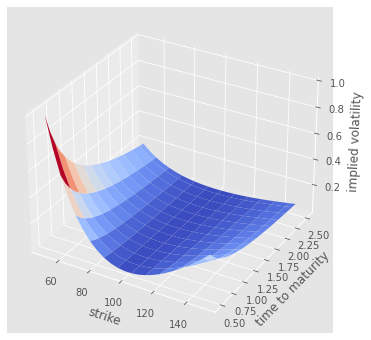

In [37]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, 
                        cmap=plt.cm.coolwarm, linewidth=0.5,
                        antialiased=True)

ax.set_xlabel('strike')
ax.set_ylabel('time to maturity')
ax.set_zlabel('implied volatility')